# PROJECT - Group7

## Step 1. Discovery

### 1-1) Define Columns & Range
Dataset is Microsoft stock historical price from 2015/04/01 to 2021/03/31
- **Open**:The stock price a day
- **Min**: the minimum stock price a day
- **Max**: The maximum stock price a day
- **Close**: The stock price a day
- **Volumn**: The number of stock has completed transaction

Dataset Range
- **Start Date**: April 1, 2015
- **End Date**: March 31, 2021

## Step 2. Data Preparation

### 2-1) Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller # stationary test
from statsmodels.tsa.stattools import acf, pacf # for auto correlation fucntion partial auto correlation
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  #plot acf and pacf
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings("ignore")
import itertools

### 2-2) Importing and Exploration of the dataset

In [2]:
df = pd.read_csv('data.csv', index_col = False)

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [5]:
df1.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [6]:
df1.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [7]:
df1.shape

(1511, 6)

In [8]:
df['Date'].unique().shape[0]

1511

- comment : **There is no duplicated date** same as the number of total rows

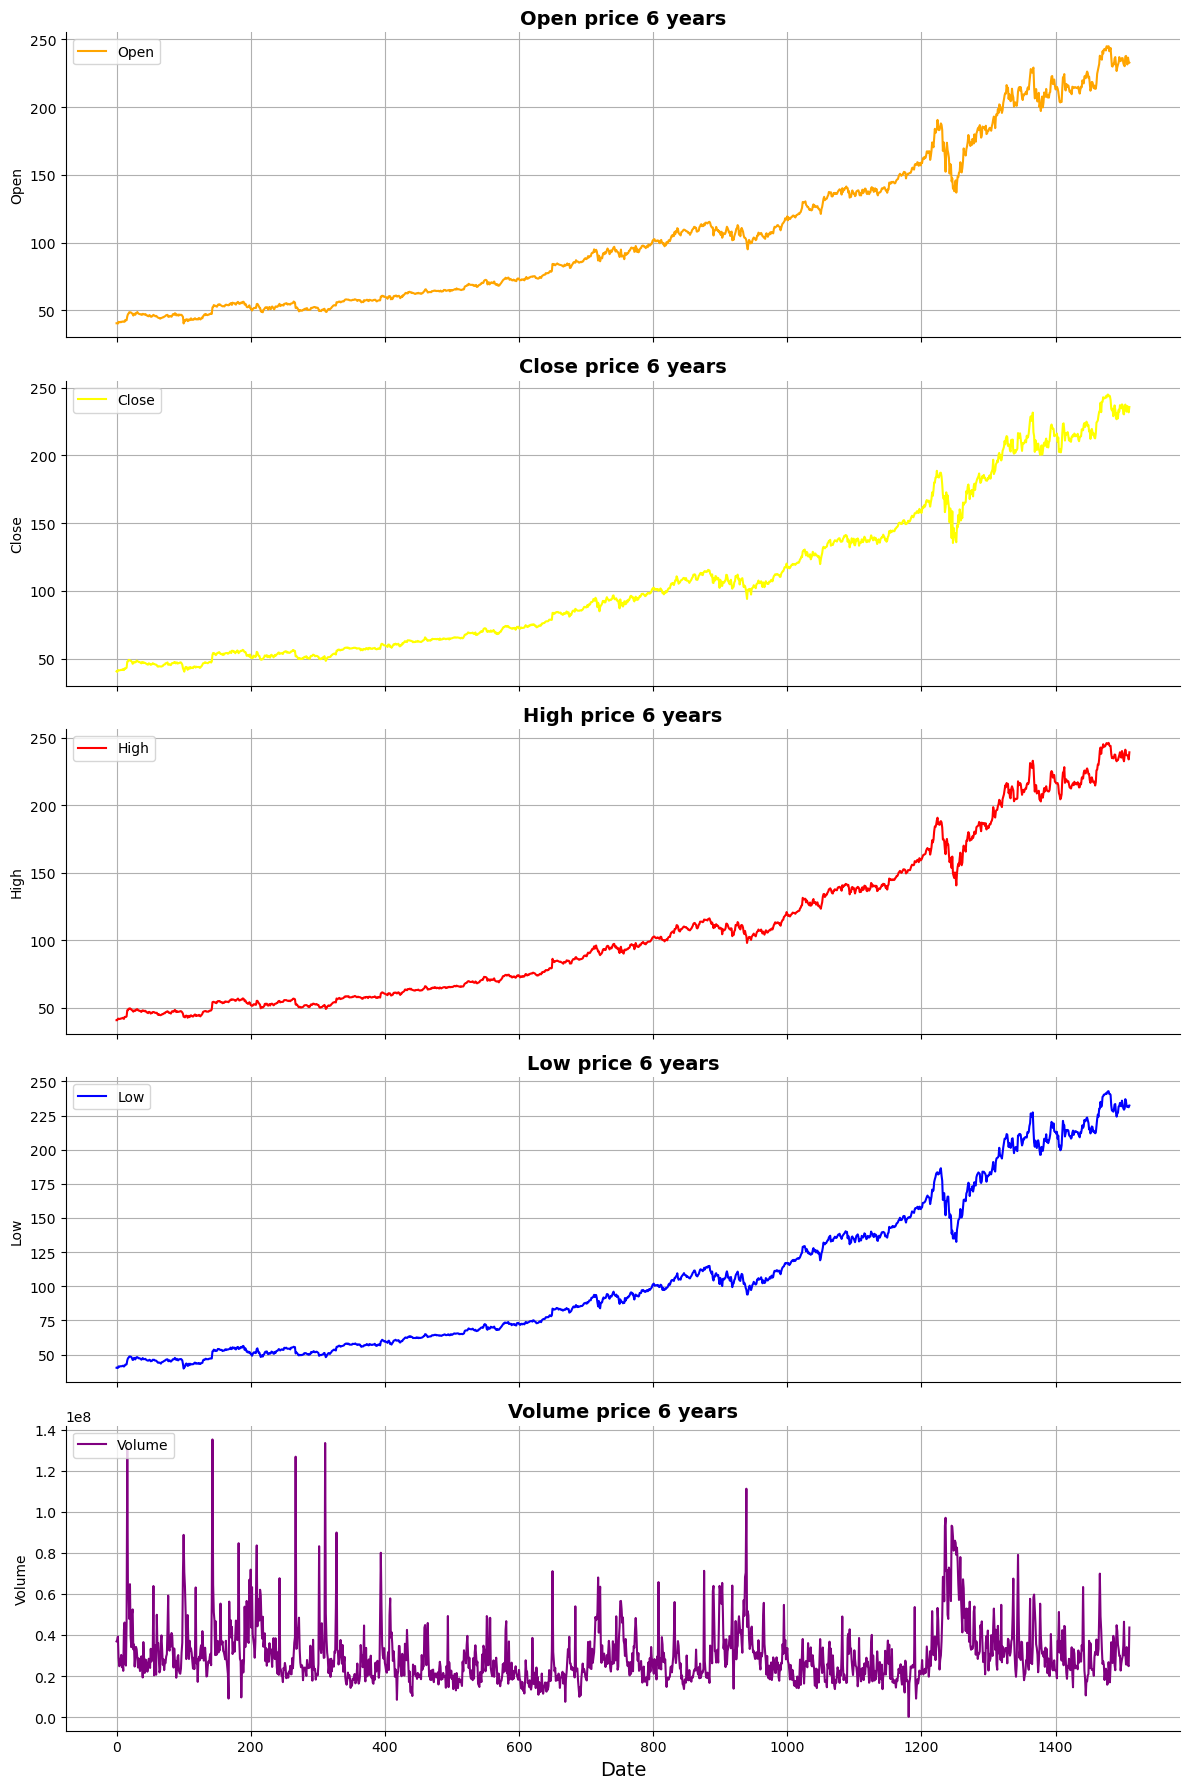

In [9]:
# Plot line graph for each column
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)
df_columns = ['Open', 'Close', 'High', 'Low', 'Volume']
colors = ['orange', 'yellow', 'red', 'blue', 'purple']
for i, column in enumerate(df_columns):
    axes[i].plot(df1[column], label=column, color=colors[i])
    axes[i].set_title(f'{column} price 6 years',size=14, weight='bold')
    axes[i].set_ylabel(column)
    axes[i].legend(loc='upper left')
    axes[i].grid(True)
    for f in ['right','top']:
        axes[i].spines[f].set_visible(False)

# Adjust layout for better fit

plt.xlabel('Date', size=14)
plt.tight_layout()
plt.show()

- **Data have no zero(0) value**

### 2-3) Checking the data types of the columns

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


- comment : **The result of Date column shows 'Object', so we need to change data type as a 'Date'**

In [11]:
sDate = df1['Date'].min()
eDate = df1['Date'].max()
print(f'Start date: {sDate}')
print(f'End date: {eDate}')
print(df1.head())

Start date: 1/10/2017 16:00:00
End date: 9/9/2020 16:00:00
                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


### 2-4) Converting the data types of columns

In [12]:
df1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

- comment : **There is no Null values**

In [13]:
# Convert the 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract year and month, set day to the first day of the month
df1['YearMonth'] = df1['Date'].dt.to_period('M').dt.to_timestamp(how='start')

# Group by 'YearMonth' and calculate the mean of 'Close' prices
df2 = df1.groupby('YearMonth')[['Open','High','Low','Close','Volume']].mean().reset_index()

df2.head()

,YearMonth,Open,High,Low,Close,Volume
0,2015-04-01,43.070952,43.736667,42.870952,43.466667,4.164453e+07
1,2015-05-01,47.590000,47.977000,47.185500,47.530000,3.165364e+07
2,2015-06-01,46.104545,46.466364,45.679545,45.964091,3.022061e+07
3,2015-07-01,45.484545,46.013182,45.145455,45.611818,3.297537e+07
4,2015-08-01,45.541905,46.120476,44.933810,45.506667,3.697607e+07


- comment : **Converted 'Object' type to 'Date' type**
- comment : **Get average values on the monthly basis from the daily basis for checking seasonality (12 months)**

In [14]:
df2['Date'] = df2['YearMonth']
df2.drop('YearMonth', axis=1, inplace=True)
df2.head()

,Open,High,Low,Close,Volume,Date
0,43.070952,43.736667,42.870952,43.466667,4.164453e+07,2015-04-01
1,47.590000,47.977000,47.185500,47.530000,3.165364e+07,2015-05-01
2,46.104545,46.466364,45.679545,45.964091,3.022061e+07,2015-06-01
3,45.484545,46.013182,45.145455,45.611818,3.297537e+07,2015-07-01
4,45.541905,46.120476,44.933810,45.506667,3.697607e+07,2015-08-01


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    72 non-null     float64       
 1   High    72 non-null     float64       
 2   Low     72 non-null     float64       
 3   Close   72 non-null     float64       
 4   Volume  72 non-null     float64       
 5   Date    72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.5 KB


In [16]:
df2 = df2.set_index('Date')
df2.index = pd.to_datetime(df2.index)
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,43.070952,43.736667,42.870952,43.466667,4.164453e+07
2015-05-01,47.590000,47.977000,47.185500,47.530000,3.165364e+07
2015-06-01,46.104545,46.466364,45.679545,45.964091,3.022061e+07
2015-07-01,45.484545,46.013182,45.145455,45.611818,3.297537e+07
2015-08-01,45.541905,46.120476,44.933810,45.506667,3.697607e+07


- comment : **Set 'date' as an Index**

In [17]:
df2.shape[0]

72

- comment : **New dataset has 72 rows monthly basis**

### 2-5) Transformation

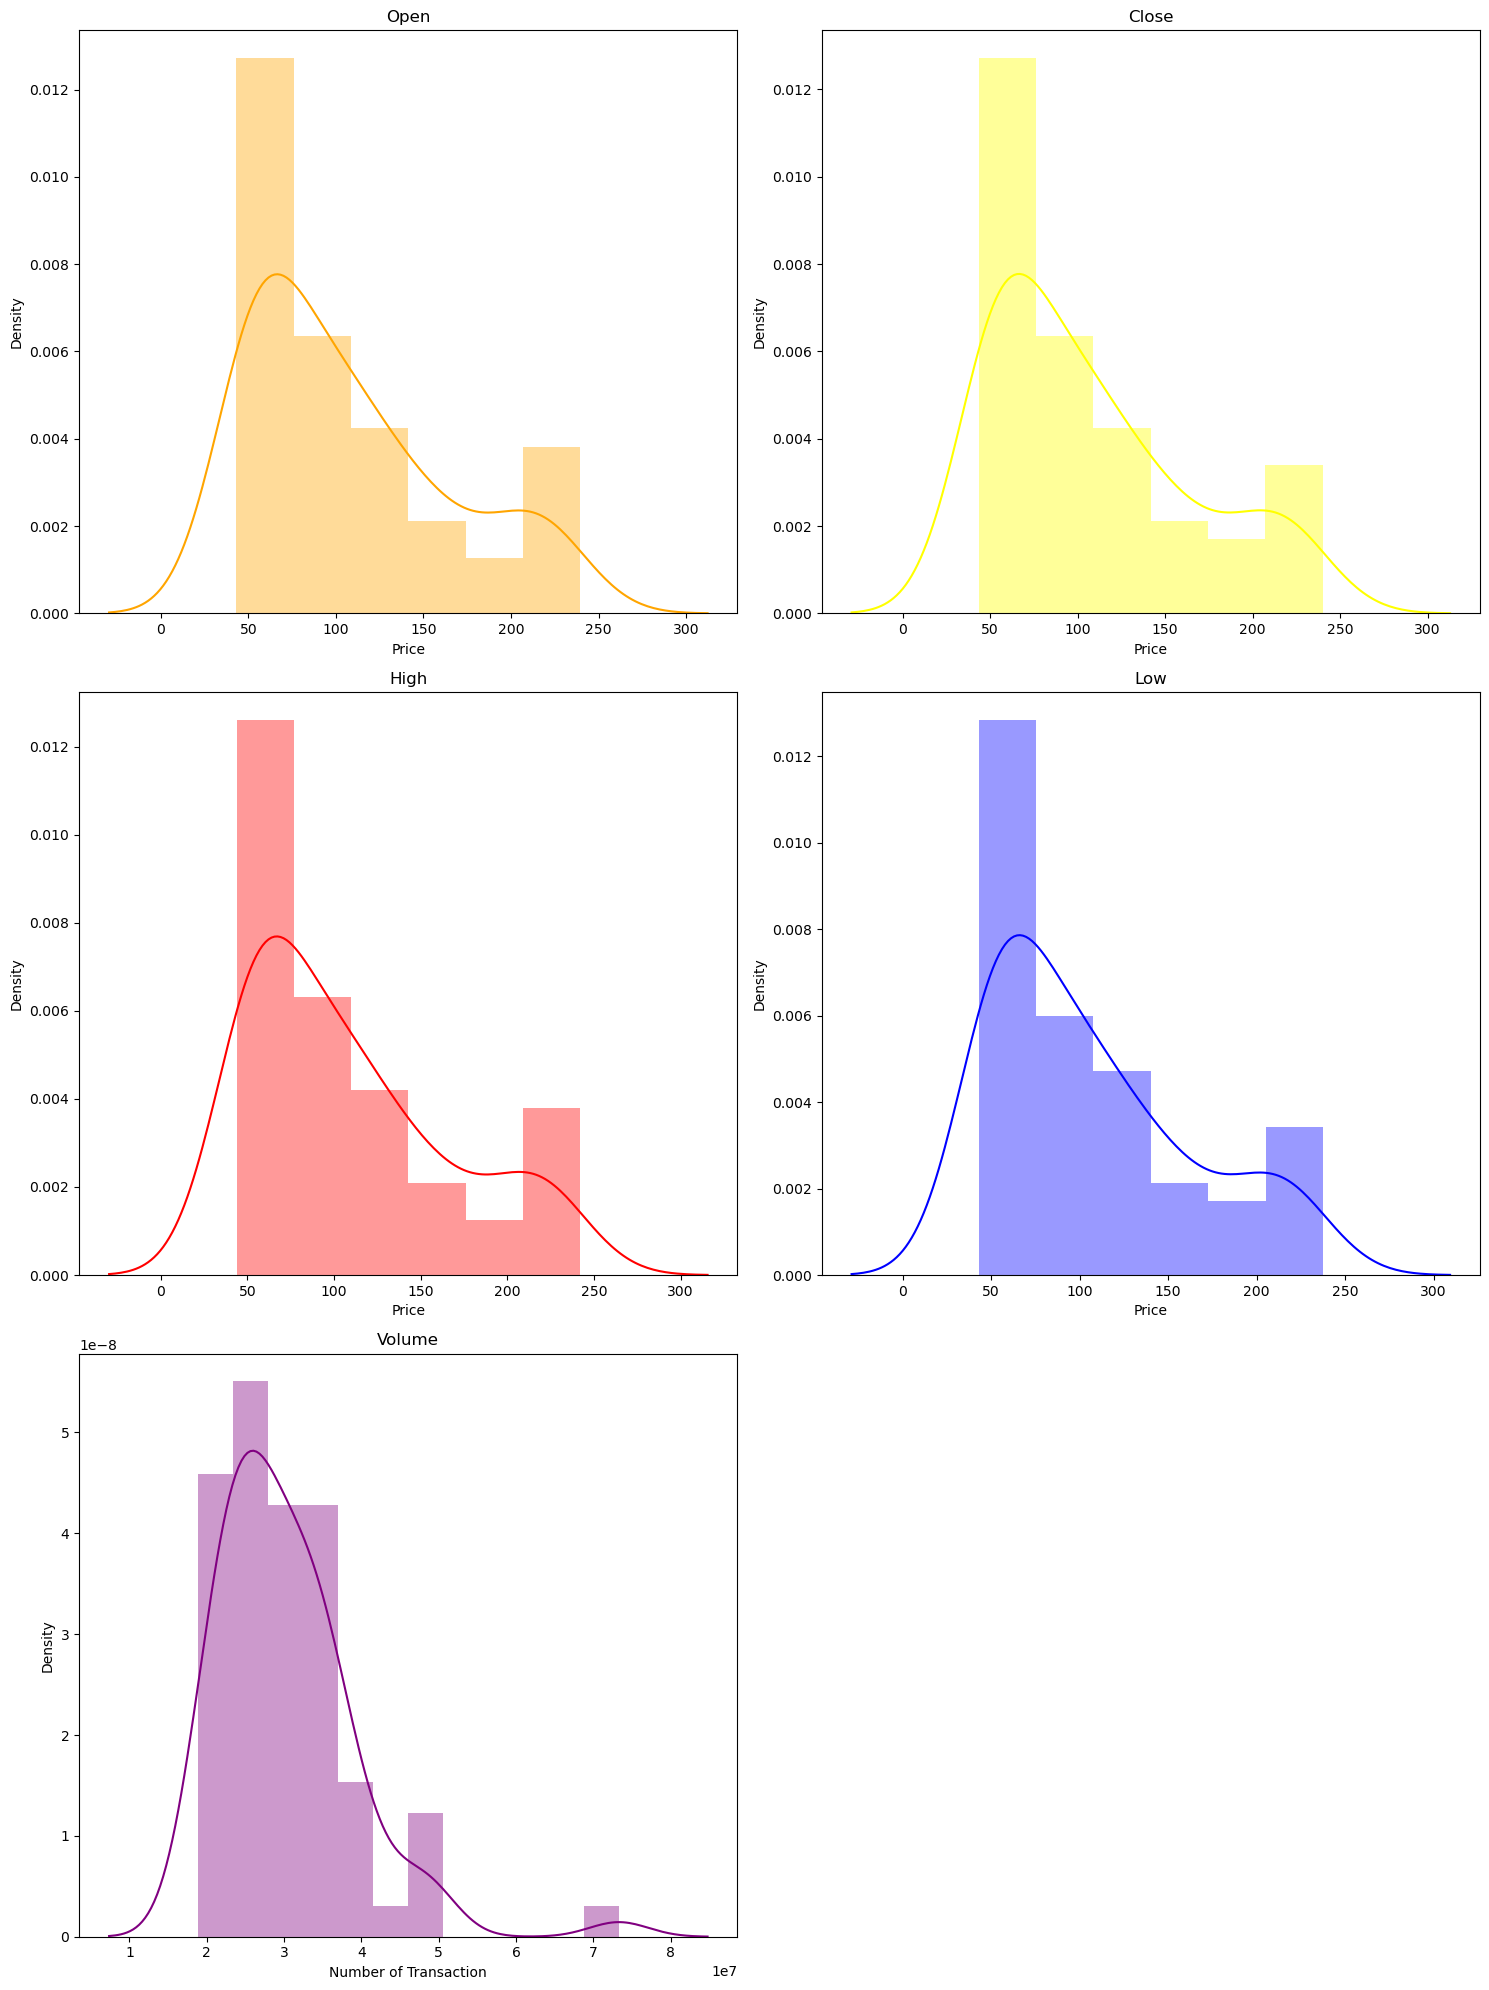

In [18]:
# distribution plot for each column
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

axes[2][1].set_visible(False)

sns.distplot(df2['Open'], ax=axes[0][0], color='orange')
axes[0][0].set_title('Open')
axes[0][0].set_xlabel('Price')    

sns.distplot(df2['Close'], ax=axes[0][1], color='yellow')
axes[0][1].set_title('Close')
axes[0][1].set_xlabel('Price')  

sns.distplot(df2['High'], ax=axes[1][0], color='red')
axes[1][0].set_title('High')
axes[1][0].set_xlabel('Price')  

sns.distplot(df2['Low'], ax=axes[1][1], color='blue')
axes[1][1].set_title('Low')
axes[1][1].set_xlabel('Price')  

sns.distplot(df2['Volume'], ax=axes[2][0], color='purple')
axes[2][0].set_title('Volume')
axes[2][0].set_xlabel('Number of Transaction')  
# Adjust layout for better fit
plt.tight_layout()
plt.show()


- comment : **All data are right-skewed.**

In [19]:
df2['sqrt_Open'] = np.sqrt(df2['Open'])
df2['sqrt_Close'] = np.sqrt(df2['Close'])
df2['sqrt_High'] = np.sqrt(df2['High'])
df2['sqrt_Low'] = np.sqrt(df2['Low'])
df2['sqrt_Volume'] = np.sqrt(df2['Volume'])

- comment : **Applied squre-root transformation**

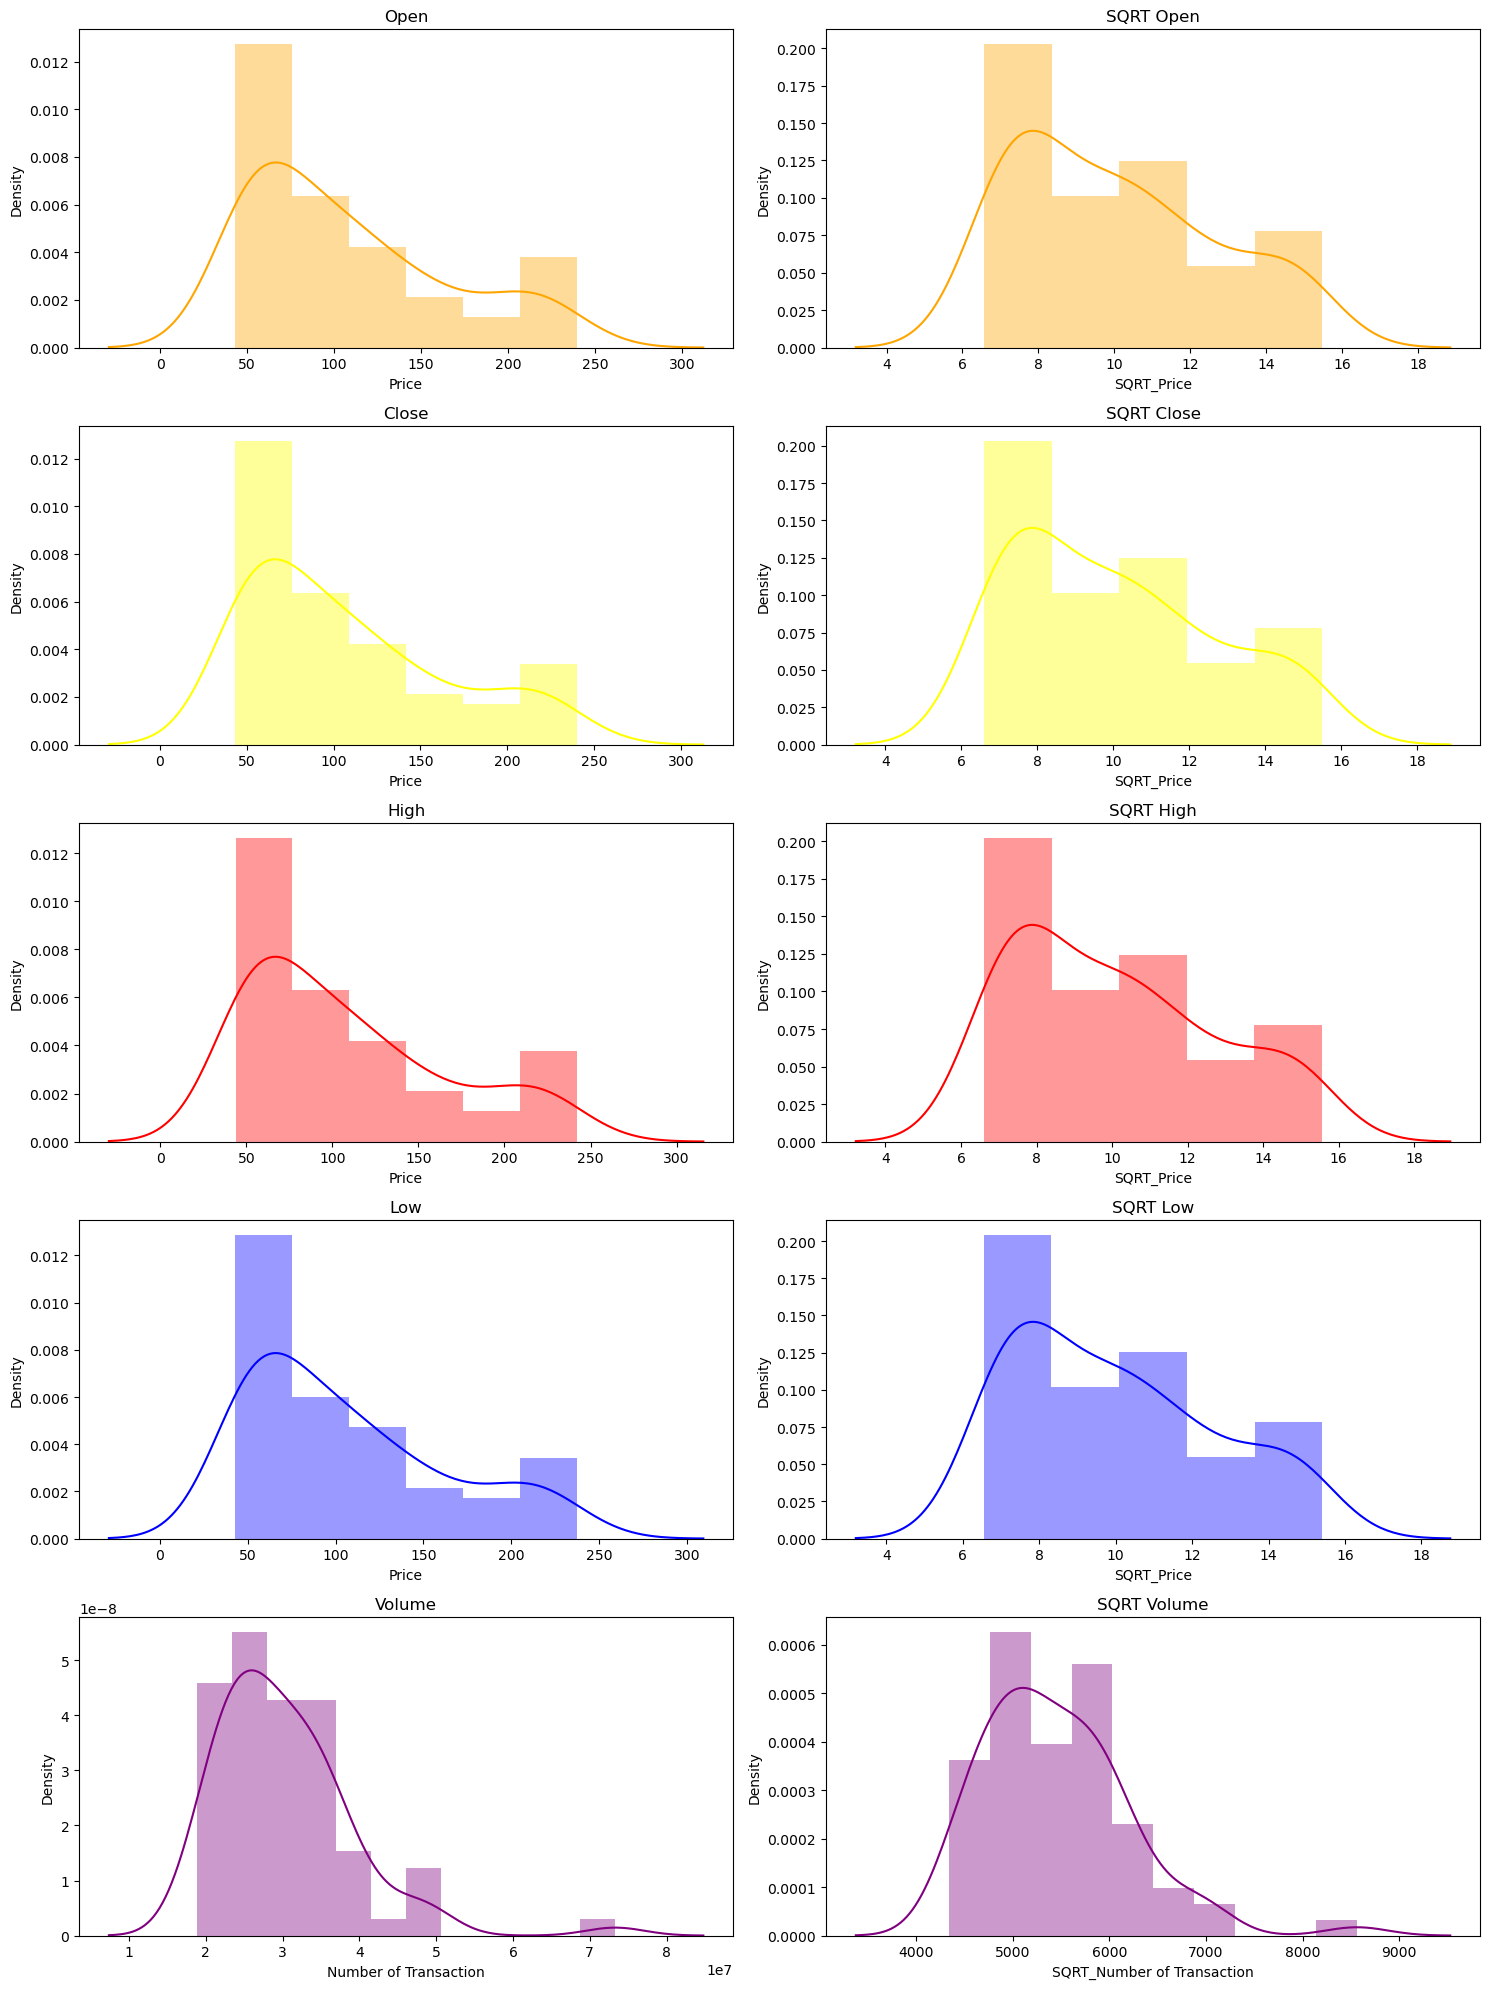

In [20]:
# Distribution plot for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.distplot(df2['Open'], ax=axes[0][0], color='orange')
axes[0][0].set_title('Open')
axes[0][0].set_xlabel('Price')

sns.distplot(df2['sqrt_Open'], ax=axes[0][1], color='orange')
axes[0][1].set_title('SQRT Open')
axes[0][1].set_xlabel('SQRT_Price')    

sns.distplot(df2['Close'], ax=axes[1][0], color='yellow')
axes[1][0].set_title('Close')
axes[1][0].set_xlabel('Price')  

sns.distplot(df2['sqrt_Close'], ax=axes[1][1], color='yellow')
axes[1][1].set_title('SQRT Close')
axes[1][1].set_xlabel('SQRT_Price')  

sns.distplot(df2['High'], ax=axes[2][0], color='red')
axes[2][0].set_title('High')
axes[2][0].set_xlabel('Price')  

sns.distplot(df2['sqrt_High'], ax=axes[2][1], color='red')
axes[2][1].set_title('SQRT High')
axes[2][1].set_xlabel('SQRT_Price')  

sns.distplot(df2['Low'], ax=axes[3][0], color='blue')
axes[3][0].set_title('Low')
axes[3][0].set_xlabel('Price')  

sns.distplot(df2['sqrt_Low'], ax=axes[3][1], color='blue')
axes[3][1].set_title('SQRT Low')
axes[3][1].set_xlabel('SQRT_Price')  

sns.distplot(df2['Volume'], ax=axes[4][0], color='purple')
axes[4][0].set_title('Volume')
axes[4][0].set_xlabel('Number of Transaction')  

sns.distplot(df2['sqrt_Volume'], ax=axes[4][1], color='purple')
axes[4][1].set_title('SQRT Volume')
axes[4][1].set_xlabel('SQRT_Number of Transaction')  

# Adjust layout for better fit
plt.tight_layout()
plt.show()


In [21]:
print("Original Close price skewness is: ",(df2['Close']).skew())
print("Square root Close price skewness is: ",df2['sqrt_Close'].skew())

print("Original Volume skewness is: ",(df2['Volume']).skew())
print("Square root Volume skewness is: ",df2['sqrt_Volume'].skew())

Original Close price skewness is:  0.8385375747106334
Square root Close price skewness is:  0.5351431380416011
Original Volume skewness is:  1.8744690090594427
Square root Volume skewness is:  1.2033048520401706


- comment : **'Square root Close price and Volume skew' is better than 'Close price and Volume skew'**

In [22]:
df2['log_Open'] = np.log(df2['Open'])
df2['log_Close'] = np.log(df2['Close'])
df2['log_High'] = np.log(df2['High'])
df2['log_Low'] = np.log(df2['Low'])
df2['log_Volume'] = np.log(df2['Volume'])

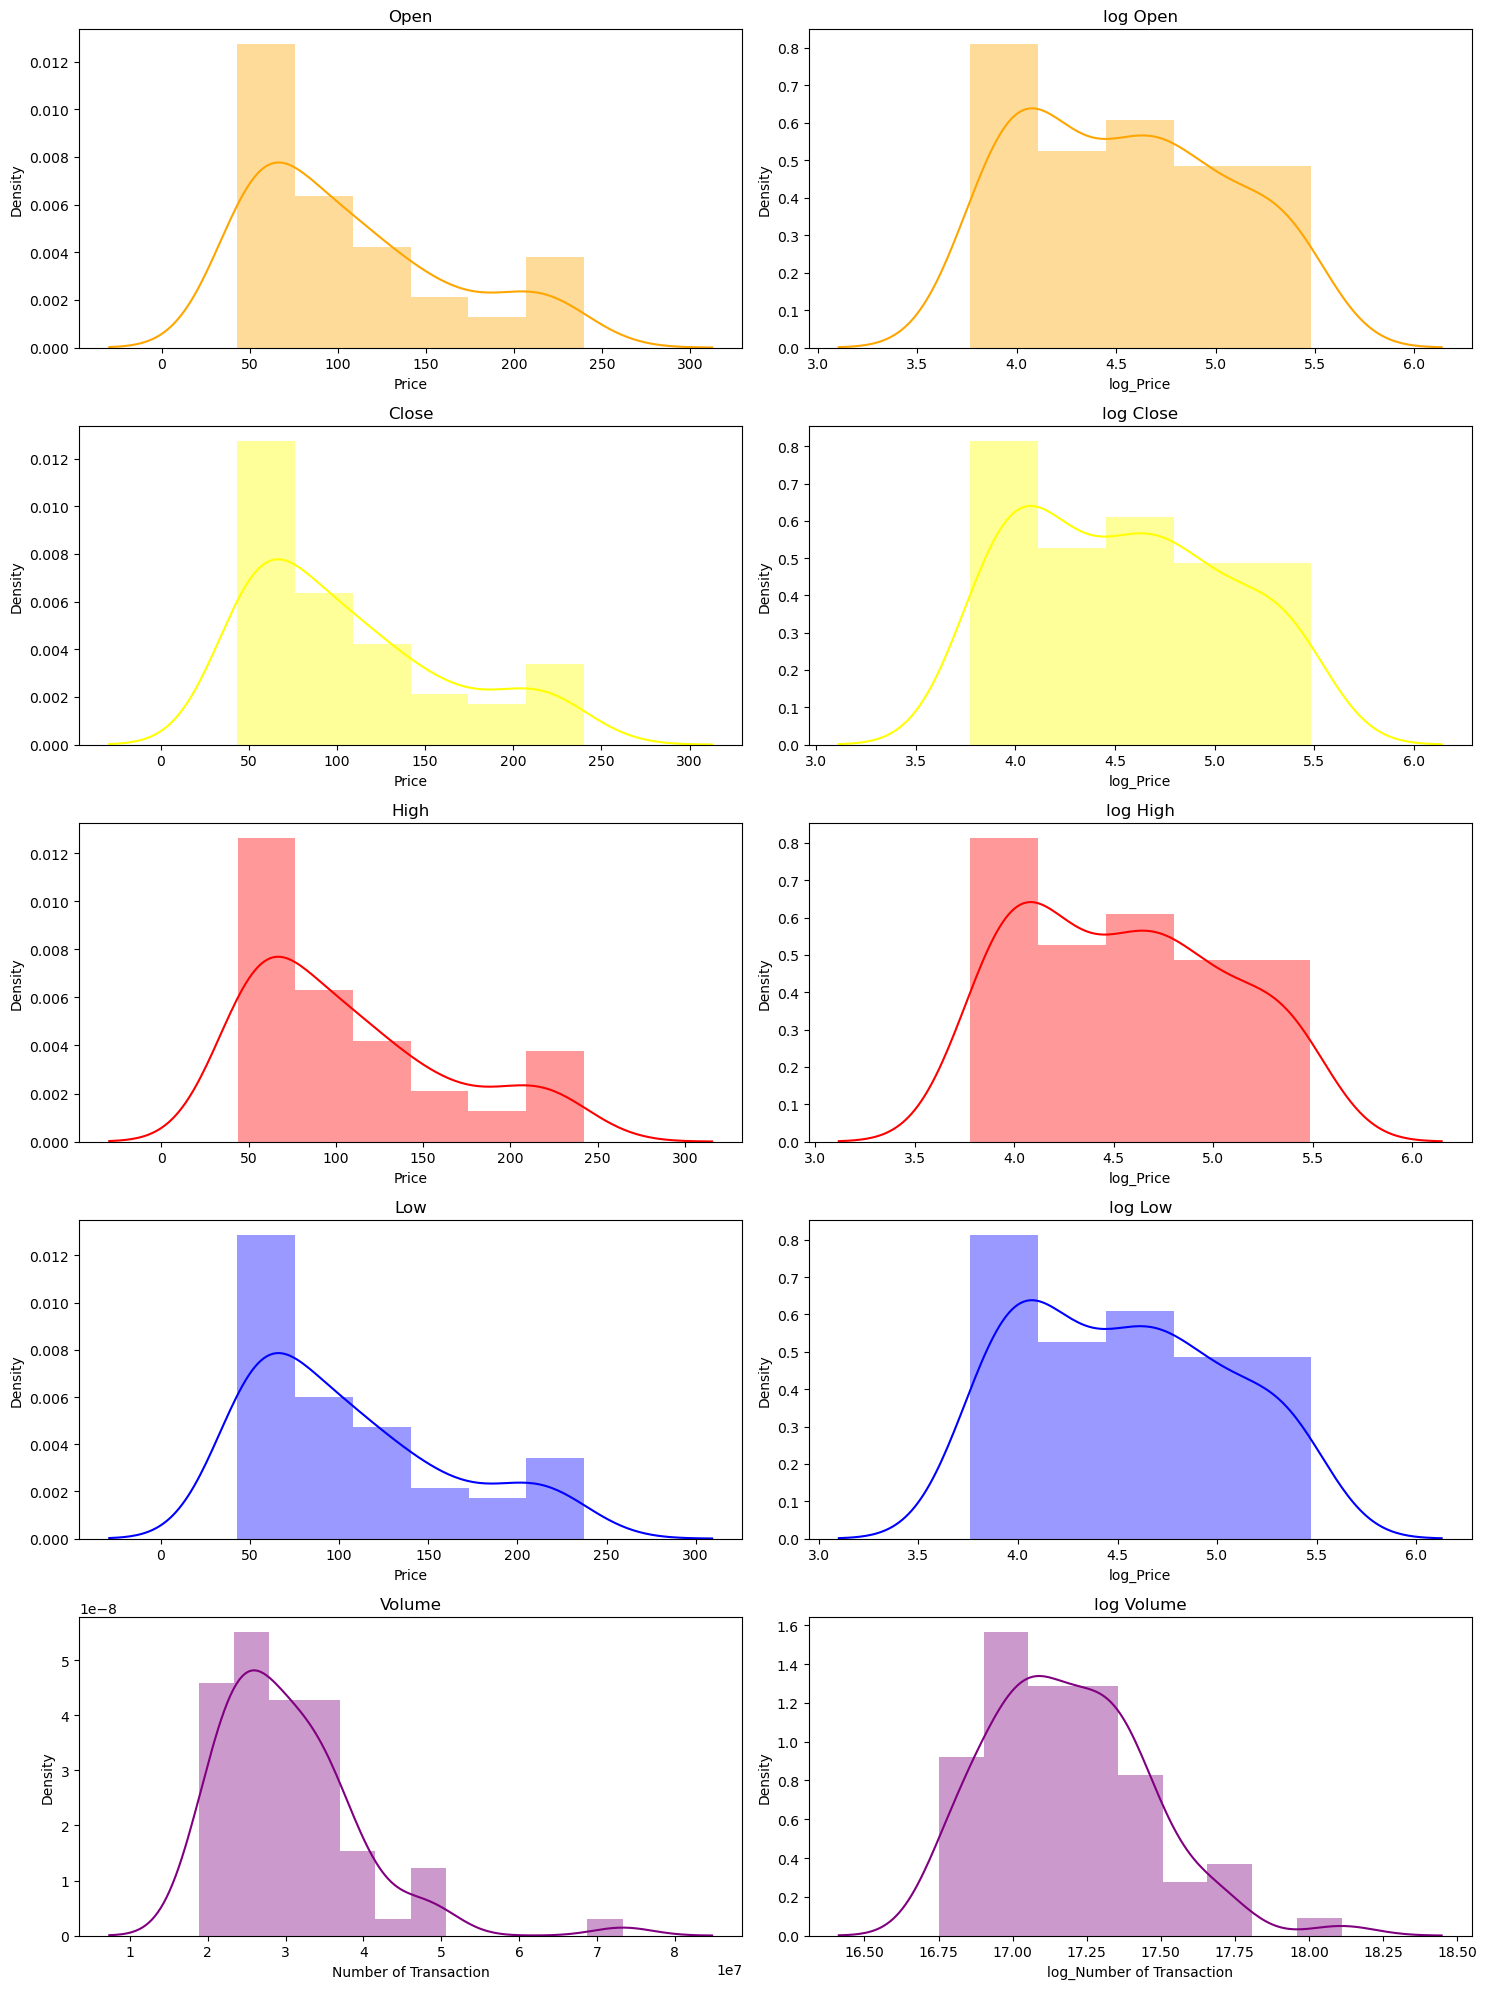

In [23]:
# Distribution for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.distplot(df2['Open'], ax=axes[0][0], color='orange')
axes[0][0].set_title('Open')
axes[0][0].set_xlabel('Price')

sns.distplot(df2['log_Open'], ax=axes[0][1], color='orange')
axes[0][1].set_title('log Open')
axes[0][1].set_xlabel('log_Price')    

sns.distplot(df2['Close'], ax=axes[1][0], color='yellow')
axes[1][0].set_title('Close')
axes[1][0].set_xlabel('Price')  

sns.distplot(df2['log_Close'], ax=axes[1][1], color='yellow')
axes[1][1].set_title('log Close')
axes[1][1].set_xlabel('log_Price')  

sns.distplot(df2['High'], ax=axes[2][0], color='red')
axes[2][0].set_title('High')
axes[2][0].set_xlabel('Price')  

sns.distplot(df2['log_High'], ax=axes[2][1], color='red')
axes[2][1].set_title('log High')
axes[2][1].set_xlabel('log_Price')  

sns.distplot(df2['Low'], ax=axes[3][0], color='blue')
axes[3][0].set_title('Low')
axes[3][0].set_xlabel('Price')  

sns.distplot(df2['log_Low'], ax=axes[3][1], color='blue')
axes[3][1].set_title('log Low')
axes[3][1].set_xlabel('log_Price')  

sns.distplot(df2['Volume'], ax=axes[4][0], color='purple')
axes[4][0].set_title('Volume')
axes[4][0].set_xlabel('Number of Transaction')  

sns.distplot(df2['log_Volume'], ax=axes[4][1], color='purple')
axes[4][1].set_title('log Volume')
axes[4][1].set_xlabel('log_Number of Transaction')  

# Adjust layout for better fit
plt.tight_layout()
plt.show()


In [24]:
print("Original Close price skewness is: ",(df2['Close']).skew())
print("Square root Close price skewness is: ",df2['sqrt_Close'].skew())

print("Original Volume skewness is: ",(df2['Volume']).skew())
print("Square root Volume skewness is: ",df2['sqrt_Volume'].skew())
print("")

print("Original Close price skewness is: ",(df2['Close']).skew())
print("Log Close price skewness is: ",df2['log_Close'].skew())

print("Original Volume skewness is: ",(df2['Volume']).skew())
print("Log Volume skewness is: ",df2['log_Volume'].skew())

Original Close price skewness is:  0.8385375747106334
Square root Close price skewness is:  0.5351431380416011
Original Volume skewness is:  1.8744690090594427
Square root Volume skewness is:  1.2033048520401706

Original Close price skewness is:  0.8385375747106334
Log Close price skewness is:  0.22849399044920798
Original Volume skewness is:  1.8744690090594427
Log Volume skewness is:  0.6816807542968792


- comment : **Log transformation is better than Square root transformation for our dataset**

### 2-6) Outerliers Treatment

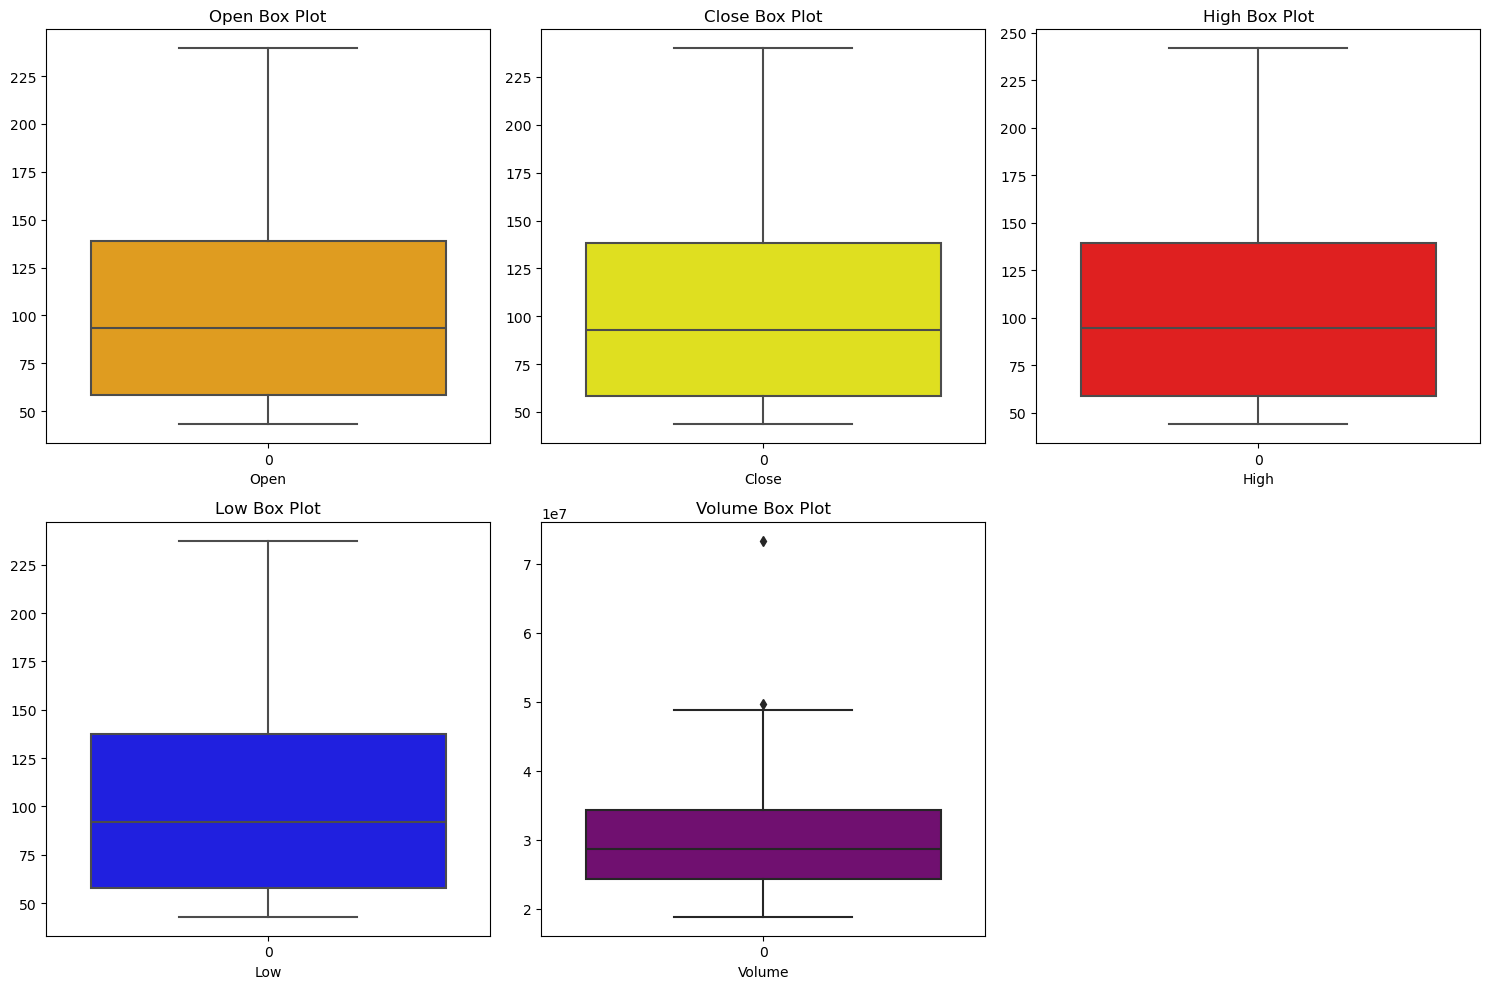

In [25]:
# Boxplot for each column
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[1][2].set_visible(False)

sns.boxplot(data=df2['Open'], ax=axes[0][0], color='orange')
axes[0][0].set_title('Open Box Plot')
axes[0][0].set_xlabel('Open')    

sns.boxplot(data=df2['Close'], ax=axes[0][1], color='yellow')
axes[0][1].set_title('Close Box Plot')
axes[0][1].set_xlabel('Close')  

sns.boxplot(data=df2['High'], ax=axes[0][2], color='red')
axes[0][2].set_title('High Box Plot')
axes[0][2].set_xlabel('High')  

sns.boxplot(data=df2['Low'], ax=axes[1][0], color='blue')
axes[1][0].set_title('Low Box Plot')
axes[1][0].set_xlabel('Low')  

sns.boxplot(data=df2['Volume'], ax=axes[1][1], color='purple')
axes[1][1].set_title('Volume Box Plot')
axes[1][1].set_xlabel('Volume')  
# Adjust layout for better fit
plt.tight_layout()
plt.show()


- **There is outlier in the Volume column and no outliers in any columns**

In [26]:
df3 = df2.copy()

<Axes: >

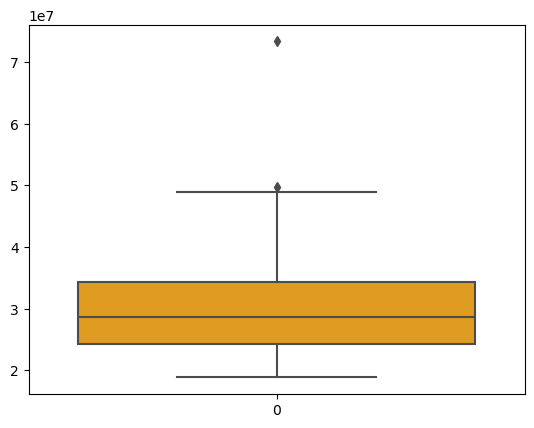

In [27]:
sns.boxplot(data=df2['Volume'], color='orange')

In [28]:
# finding the Quantiles:
Q1 = df2.Volume.quantile(0.25)
Q2 = df2.Volume.quantile(0.50)
Q3 = df2.Volume.quantile(0.75)

# IQR : Inter-Quartile Range
IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

9280063.399107145

49367081.47767857

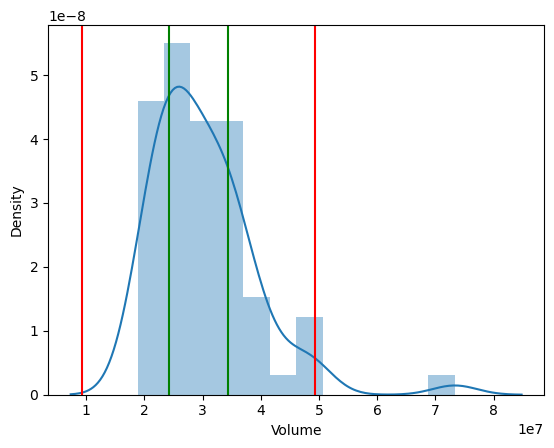

In [29]:
## Plot

sns.distplot(df2.Volume)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [30]:
df2[(df2.Volume < LC) | (df2.Volume > UC)]

,Open,High,Low,Close,Volume,sqrt_Open,sqrt_Close,sqrt_High,sqrt_Low,sqrt_Volume,log_Open,log_Close,log_High,log_Low,log_Volume
Date,,,,,,,,,,,,,,,
2018-12-01,105.023684,106.538947,102.571579,104.393684,4.969935e+07,10.248106,10.217323,10.321771,10.127763,7049.776536,4.654186,4.648169,4.668511,4.630561,17.721502
2020-03-01,151.990000,157.545000,147.598636,152.554091,7.331611e+07,12.328422,12.351279,12.551693,12.149018,8562.482610,5.023815,5.027519,5.059711,4.994497,18.110291


In [31]:
df3 = df2[(df2.Volume>LC) & (df2.Volume<UC)] 

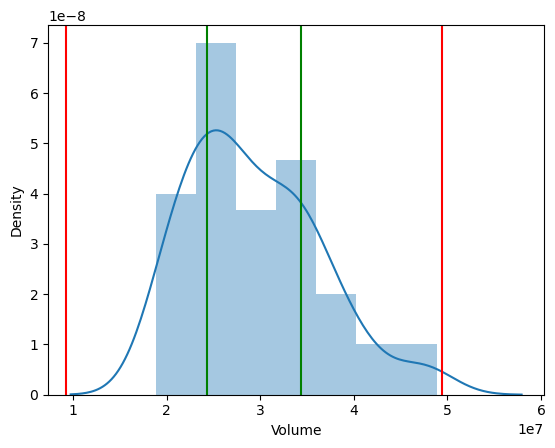

In [32]:
## Plot

sns.distplot(df3.Volume)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

<Axes: >

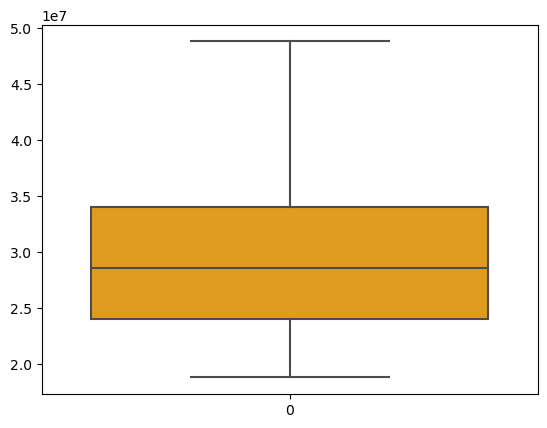

In [33]:
sns.boxplot(data=df3['Volume'], color='orange')

- **Completed data cleaning**

### 2-7) Analyze data description - **Correlation**

In [34]:
df4 = df3[['Open','High','Low','Close','Volume']].copy()

In [35]:
df4.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,43.070952,43.736667,42.870952,43.466667,4.164453e+07
2015-05-01,47.590000,47.977000,47.185500,47.530000,3.165364e+07
2015-06-01,46.104545,46.466364,45.679545,45.964091,3.022061e+07
2015-07-01,45.484545,46.013182,45.145455,45.611818,3.297537e+07
2015-08-01,45.541905,46.120476,44.933810,45.506667,3.697607e+07


            Open      High       Low     Close    Volume
Open    1.000000  0.999984  0.999975  0.999992  0.044472
High    0.999984  1.000000  0.999931  0.999976  0.048756
Low     0.999975  0.999931  1.000000  0.999984  0.039409
Close   0.999992  0.999976  0.999984  1.000000  0.043802
Volume  0.044472  0.048756  0.039409  0.043802  1.000000


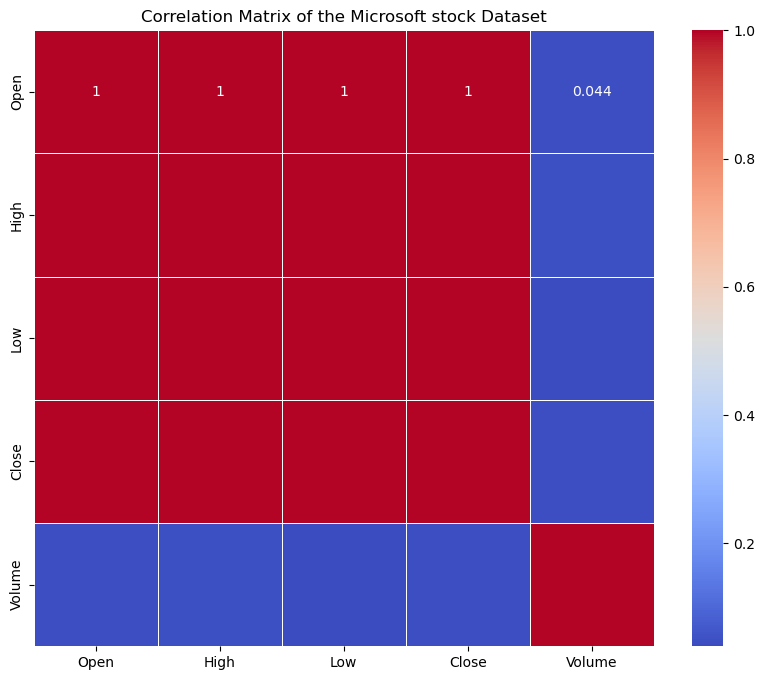

In [36]:
#correlation matrix
corr_matrix = df4.corr()
print(corr_matrix)

#visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the Microsoft stock Dataset')
plt.show()

- **All prices have strong correlations with each price**
- **Volume has low correlations with all prices in our dataset**

## Step 3. Model Planning

**Candidate Models** : Linear Regresstion Model, Time Series Analysis Model

**according  to our objectives and problem statements, we need to**
- **Predict Future Close Prices** : Utilize Microsoft's stock data from 2015 to 2021 to train a model for predicting future closing prices.
- **Decision-Making for Trading Strategy** : Based on the predicted future prices, determine whether to sell, buy, or stay in the market (a day or a week later).
Therefore, we decide to apply Time-series Analysis Model

NOTE: Linear Regression may be applied in the scenario that we want to
**Identify Influencing Key Features**: Analyze historical stock data to identify key features influencing Microsoft's stock prices change

**Selected Model** : Time Series Analysis Model

In [37]:
df5 = df2[['Close']].copy()
df5.head()

,Close
Date,
2015-04-01,43.466667
2015-05-01,47.530000
2015-06-01,45.964091
2015-07-01,45.611818
2015-08-01,45.506667


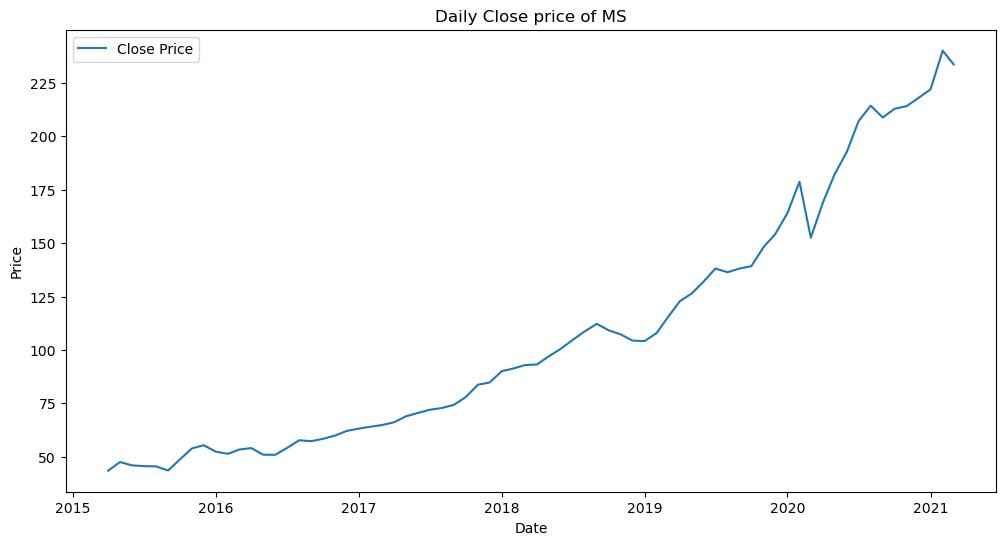

In [38]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df5, label='Close Price')
plt.title('Daily Close price of MS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 3-1) Lag Features

In [39]:
# Create lag features
df5['Lag_1'] = df5['Close'].shift(1)
df5['Lag_2'] = df5['Close'].shift(2)

# Display the data with lag features
df5.head()

,Close,Lag_1,Lag_2
Date,,,
2015-04-01,43.466667,NaN,NaN
2015-05-01,47.530000,43.466667,NaN
2015-06-01,45.964091,47.530000,43.466667
2015-07-01,45.611818,45.964091,47.530000
2015-08-01,45.506667,45.611818,45.964091


### 3-2) Rolling Statistics

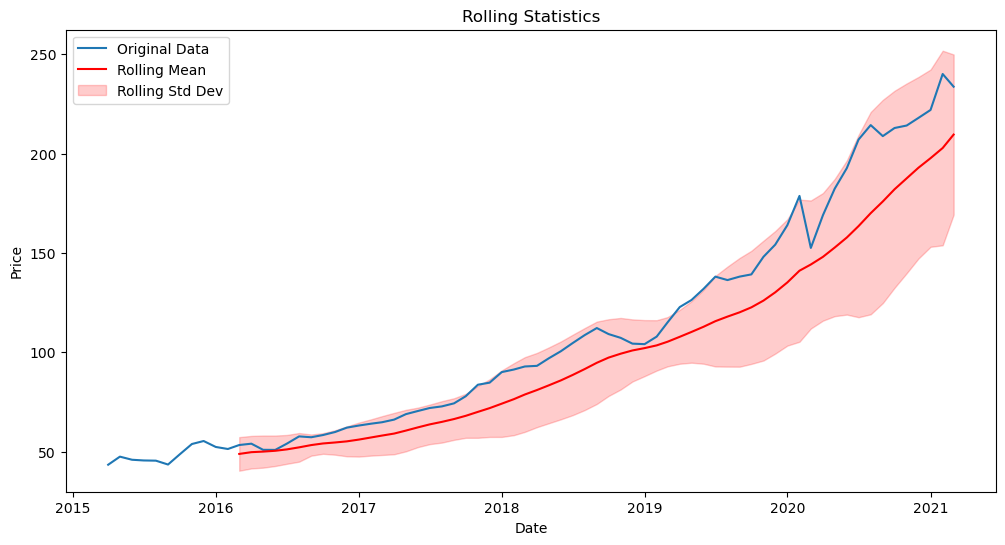

In [40]:
# Calculate rolling mean and standard deviation
df5['Rolling_Mean'] = df5['Close'].rolling(window=12).mean()
df5['Rolling_Std'] = df5['Close'].rolling(window=12).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df5['Close'], label='Original Data')
plt.plot(df5['Rolling_Mean'], label='Rolling Mean', color='red')
plt.fill_between(df5.index, df5['Rolling_Mean'] - 2*df5['Rolling_Std'], 
                 df5['Rolling_Mean'] + 2*df5['Rolling_Std'], color='red', alpha=0.2, label='Rolling Std Dev')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Interpretation:
- Smoothing: The rolling mean smooths out the time series data by averaging over the window period, making it easier to see overall trends and patterns.
- Trend Identification: It helps in identifying the underlying trend from seasonal or random variations

### 3-3) Seasonal Decomposition

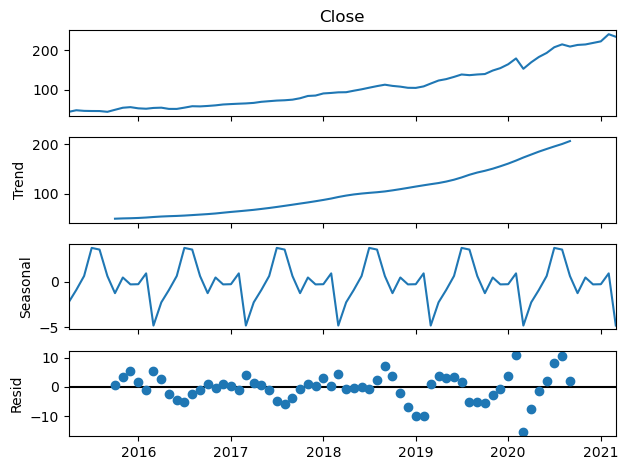

In [41]:
# Decompose the time series
decomposition = seasonal_decompose(df5['Close'].dropna(), model='additive', period=12)
decomposition.plot()
plt.show()

- It is evident that there is both a time trend and seasonality → **Selected SARIMAX model** among ARIMA, SARIMA, SARIMAX

## Step 4. Model Building - SARIMAX model


### 4-1) Train-Test Split

In [42]:
df5.shape[0]

72

- comment : **72 months = 6 years**

### 4-2) SARIMAX Model - 12months vs. 6months

#### 12 months

In [43]:
train_12m = df5.iloc[:-12] # apply month 1- 60 for training
test_12m = df5.iloc[-12:]  # apply month 61 - 72 for test

# Display the train and test sets
print('The number of train data: ', train_12m.count())
print('The number of test data: ', test_12m.count())
print('Total data number: ', train_12m.count() + test_12m.count())

The number of train data:  Close           60
Lag_1           59
Lag_2           58
Rolling_Mean    49
Rolling_Std     49
dtype: int64
The number of test data:  Close           12
Lag_1           12
Lag_2           12
Rolling_Mean    12
Rolling_Std     12
dtype: int64
Total data number:  Close           72
Lag_1           71
Lag_2           70
Rolling_Mean    61
Rolling_Std     61
dtype: int64


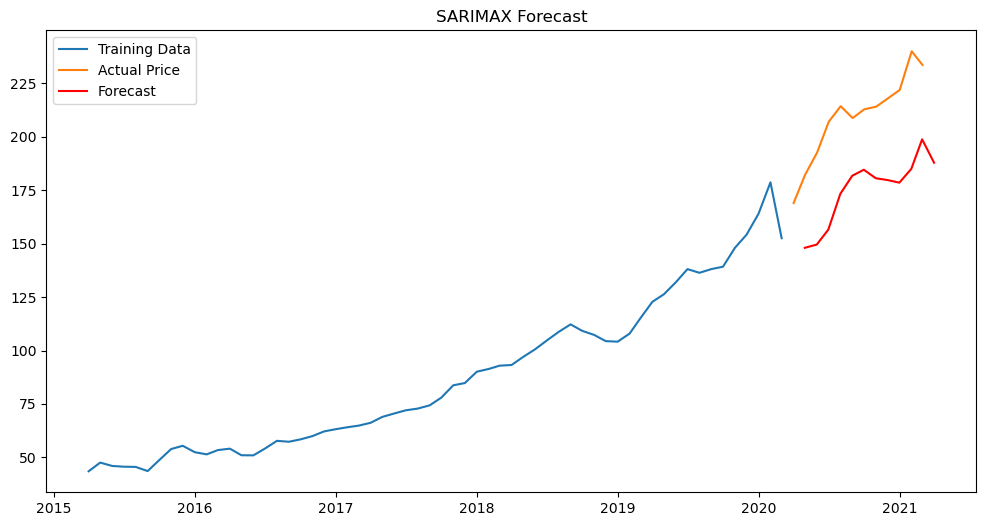

In [44]:
# Fit the SARIMAX model
model = SARIMAX(train_12m['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast
forecast_12m = model_fit.get_forecast(steps=12).predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_12m['Close'], label='Training Data')
plt.plot(test_12m['Close'], label='Actual Price')
plt.plot(pd.date_range(start=test_12m.index[0], periods=12, freq='M'), forecast_12m, label='Forecast', color='red')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

#### 6 months

In [45]:
train_6m = df5.iloc[:-6] # apply month 1 - 66 for training
test_6m = df5.iloc[-6:]  # apply month 67 - 72 for test

# Display the train and test sets
print('The number of train data: ', train_6m.count())
print('The number of test data: ', test_6m.count())
print('Total data number: ', train_6m.count() + test_6m.count())

The number of train data:  Close           66
Lag_1           65
Lag_2           64
Rolling_Mean    55
Rolling_Std     55
dtype: int64
The number of test data:  Close           6
Lag_1           6
Lag_2           6
Rolling_Mean    6
Rolling_Std     6
dtype: int64
Total data number:  Close           72
Lag_1           71
Lag_2           70
Rolling_Mean    61
Rolling_Std     61
dtype: int64


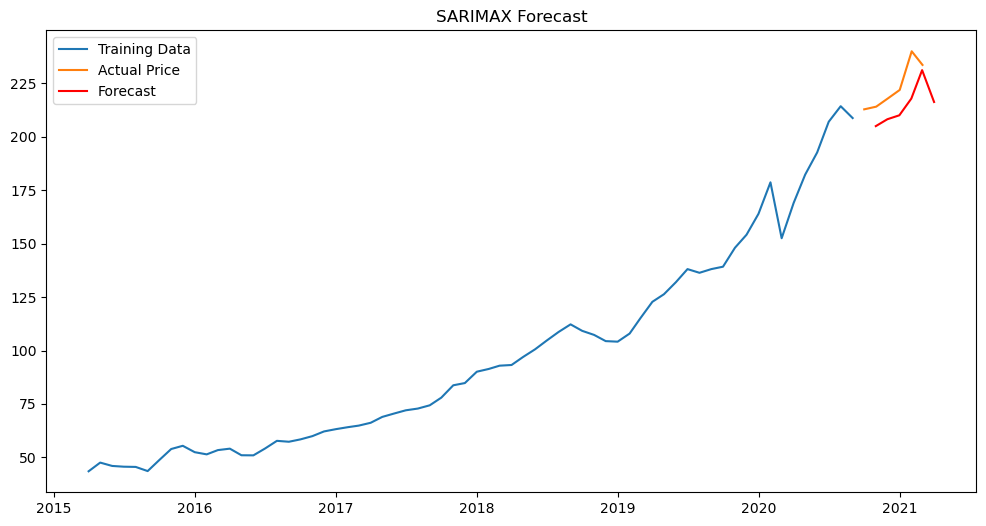

In [46]:
# Fit the SARIMAX model
model = SARIMAX(train_6m['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast
forecast_6m = model_fit.get_forecast(steps=6).predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_6m['Close'], label='Training Data')
plt.plot(test_6m['Close'], label='Actual Price')
plt.plot(pd.date_range(start=test_6m.index[0], periods=6, freq='M'), forecast_6m, label='Forecast', color='red')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

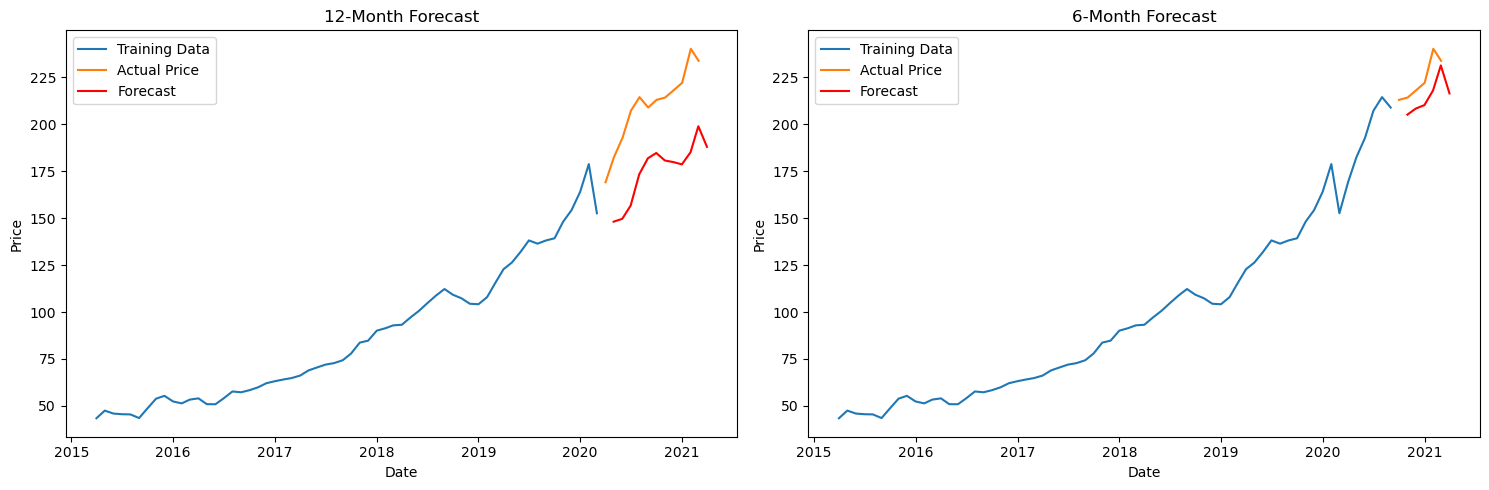

In [47]:
# Create a figure with 2 subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 12-month forecast
axes[0].plot(train_12m['Close'], label='Training Data')
axes[0].plot(test_12m['Close'], label='Actual Price')
axes[0].plot(pd.date_range(start=test_12m.index[0], periods=12, freq='M'), forecast_12m, label='Forecast', color='red')
axes[0].set_title('12-Month Forecast')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot for 6-month forecast
axes[1].plot(train_6m['Close'], label='Training Data')
axes[1].plot(test_6m['Close'], label='Actual Price')
axes[1].plot(pd.date_range(start=test_6m.index[0], periods=6, freq='M'), forecast_6m, label='Forecast', color='red')
axes[1].set_title('6-Month Forecast')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

#### Regarding the graphs shown above, 6-month prediction provides better accuracy than 12-month prediction.
- According to the Harvard Business Review, shorter forecasting periods generally produces more reliable and accurate forecasts (Harvard Business Review, 1971).
- For 12-month prediction, we train the model with only 60 months and we test the model with 12 months. For 6-month prediction, we train the model with 66 months and we test the model with 6 months. 

In [48]:
# Accuracy metrics
rmse_12m = np.mean((forecast_12m - test_12m['Close'])**2)**0.5
print(f'RMSE of 12 month prediction with parameter order=(5, 1, 0), seasonal_order=(1, 1, 1, 12): {rmse_12m}')

rmse_6m = np.mean((forecast_6m - test_6m['Close'])**2)**0.5
print(f'RMSE of 6 month prediction with parameter order=(5, 1, 0), seasonal_order=(1, 1, 1, 12): {rmse_6m}')


RMSE of 12 month prediction with parameter order=(5, 1, 0), seasonal_order=(1, 1, 1, 12): 34.798754444192284
RMSE of 6 month prediction with parameter order=(5, 1, 0), seasonal_order=(1, 1, 1, 12): 9.60451853881931


- comment : 6-month prediction produces more reliable and accurate forecasts

### 4-3) Select the model parameters

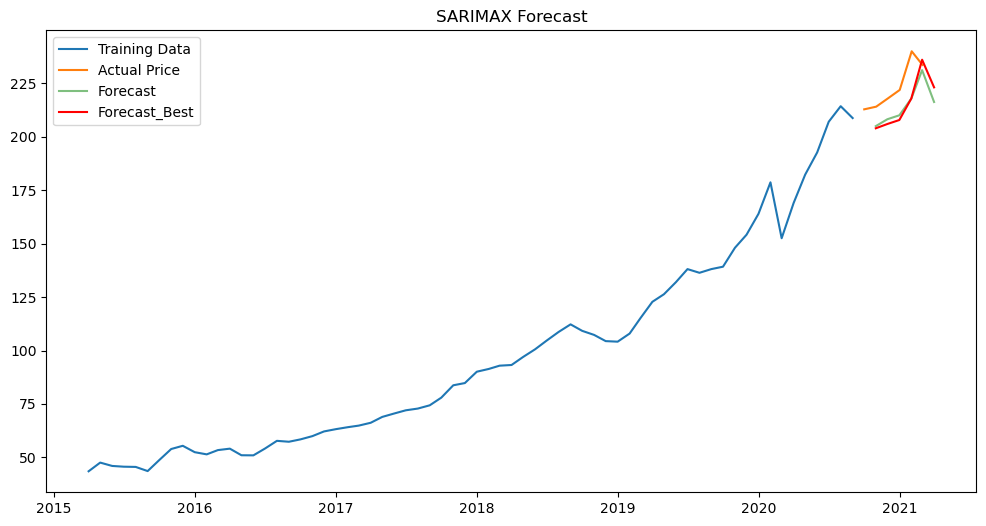

In [49]:
# Fit the SARIMAX model
model = SARIMAX(train_6m['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

model_best = SARIMAX(train_6m['Close'], order=(3, 1, 3), seasonal_order=(3, 1, 3, 12))
model_fit_best = model_best.fit()

# Forecast
forecast_6m = model_fit.get_forecast(steps=6).predicted_mean
forecast_best = model_fit_best.get_forecast(steps=6).predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_6m['Close'], label='Training Data')
plt.plot(test_6m['Close'], label='Actual Price')
plt.plot(pd.date_range(start=test_6m.index[0], periods=6, freq='M'), forecast_6m, label='Forecast', color='Green', alpha=0.5)
plt.plot(pd.date_range(start=test_6m.index[0], periods=6, freq='M'), forecast_best, label='Forecast_Best', color='Red')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

In [50]:
# Accuracy metrics
rmse_6m = np.mean((forecast_6m - test_6m['Close'])**2)**0.5
print(f'RMSE of 6 month prediction with parameter order=(5, 1, 0), seasonal_order=(1, 1, 1, 12): {rmse_6m}')

rmse_best = np.mean((forecast_best - test_6m['Close'])**2)**0.5
print(f'RMSE of 6 month prediction with parameter order=(3, 1, 3), seasonal_order=(3, 1, 3, 12): {rmse_best}')

RMSE of 6 month prediction with parameter order=(5, 1, 0), seasonal_order=(1, 1, 1, 12): 9.60451853881931
RMSE of 6 month prediction with parameter order=(3, 1, 3), seasonal_order=(3, 1, 3, 12): 8.040139844543555


## Step 5. Communicate Result
#### The model with the best fit parameters


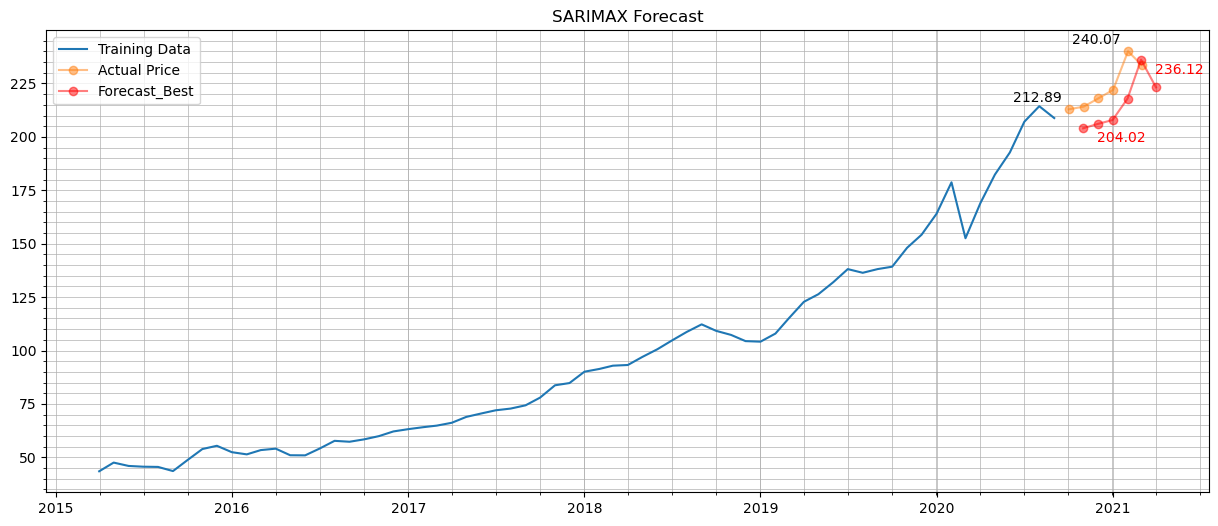

In [51]:
# Fit the SARIMAX model
model_best = SARIMAX(train_6m['Close'], order=(3, 1, 3), seasonal_order=(3, 1, 3, 12))
model_fit_best = model_best.fit()

# Forecast
forecast_best = model_fit_best.get_forecast(steps=6).predicted_mean

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_6m['Close'], label='Training Data')
plt.plot(test_6m['Close'], label='Actual Price', marker ='o', alpha = 0.5)
forecast_dates = pd.date_range(start=test_6m.index[0], periods=6, freq='M')
plt.plot(forecast_dates, forecast_best, label='Forecast_Best', color='Red', marker ='o', alpha = 0.5)

# Annotate the test['Close'] values
for i, value in enumerate(test_6m['Close']):
    if (i in (0, 4)):
        plt.annotate(f'{value:.2f}', (test_6m.index[i], value), textcoords="offset points", xytext=(-40, 5), ha='left', color='Black')

# Annotate the forecast_best values
for i, value in enumerate(forecast_best):
    if (i in (0, 4)):
        plt.annotate(f'{value:.2f}', (forecast_dates[i], value), textcoords="offset points", xytext=(10, -10), ha='left', color='Red')

plt.grid(True, which='both', linewidth=0.5)
plt.minorticks_on() 

plt.legend()
plt.title('SARIMAX Forecast')
plt.show()


## Conclusion

- **Problem Statement** : Develop a predictive model using Microsoft's stock data to forecast closing prices and inform monthly trading decisions. (buy, sell, or hold) 

- **Project Result** : Based on the result, this predictive model forecasts the closing price of Microsoft's stock in the 6-month period. The trading decision would be purchasing at the first month which is the lowest point and selling at the fifth month which is the highest point.

## References

- EMC Education Services. (2015). Data science & big data analytics: Discovering, analyzing, visualizing and presenting data. John Wiley & Sons, Inc.

- Harvard Business Review. (1971, July). How to choose the right forecasting technique. Harvard Business Review. Retrieved from https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique